In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data= pd.read_csv('ex1data1.txt', header=None)

In [3]:
#Initialising X and y
X, y, theta= np.array(data[0]), np.array(data[1]), [0,0]
m=y.size #No. of training examples
n=1# No. of features

In [4]:
def plots(X,y):
    plt.figure(figsize=(7,7));
    plt.scatter(X,y);
    plt.xlabel("Population in 10,000");
    plt.ylabel("Profit in 10,000 $");
    plt.title("Profit v/s Population Plot");
    plt.show();

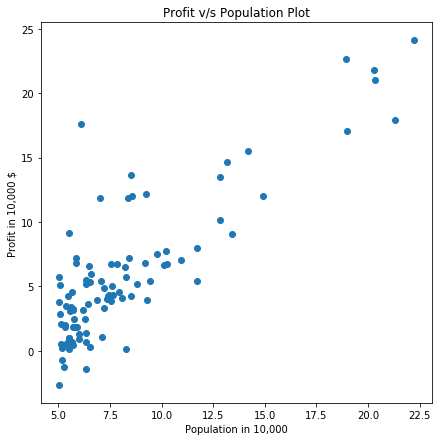

In [5]:
plots(X,y)

In [6]:
def compute_cost(X, y, theta):
    X1 =np.zeros([m, 2])
    X1[:,0]=1; X1[:,1:]= X.reshape(m,n)
    J= sum( (np.matmul(X1,theta)- y)**2)/(2*m)
    return J

compute_cost(X, y, theta)

32.072733877455654

In [7]:
def gradient_descent(X, y, theta, alpha, num_iters):
    theta=theta.copy()
    J_history=[]
    
    X1 =np.zeros([m, 2])
    X1[:,0]=1; X1[:,1:]= X.reshape(m,n)
    
    for i in range(num_iters):
        theta-= alpha*( np.matmul( X1.transpose(), (np.matmul(X1, theta) - y) ) )/m
        J_history.append(compute_cost(X, y, theta))               
    
    return theta, J_history

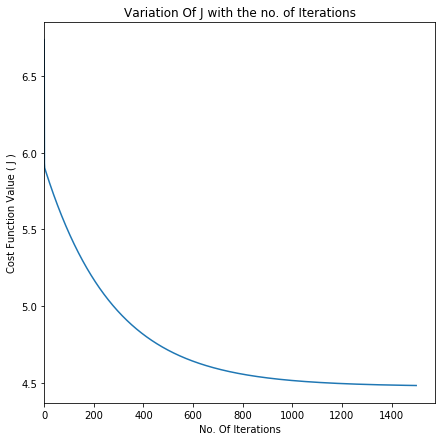

In [8]:
theta, J_history= gradient_descent(X, y, [0.0, 0.0], 0.01, 1500)
plt.figure(figsize=(7,7));
plt.plot(J_history);
plt.xlabel("No. Of Iterations");
plt.ylabel("Cost Function Value "+"("+" J " +")");
plt.title("Variation Of J with the no. of Iterations");
plt.xlim(0,)
plt.ylim()
plt.show();

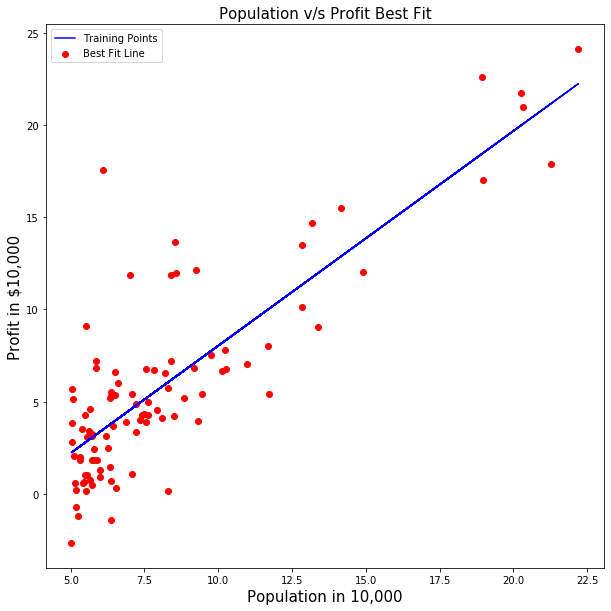

In [9]:
plt.figure(figsize=(10,10));
plt.scatter(X,y,c='red');

X1 =np.zeros([m, 2])
X1[:,0]=1; X1[:,1:]= X.reshape(m,n)

plt.plot(X, np.matmul(X1,theta), c="blue");
plt.xlabel("Population in 10,000", fontsize=15)
plt.ylabel("Profit in $10,000", fontsize=15)
plt.title("Population v/s Profit Best Fit", fontsize=15)
plt.legend(["Training Points", "Best Fit Line"])
plt.show();

In [10]:
def predict(x, theta):
    profit= np.dot( theta.transpose(), x)*10000
    return profit

In [11]:
profit1= predict(np.array([1,3.5]), theta)
print(profit1)

4519.7678677017675


# Multivariate Linear Regression
Optional Part of Exercise 1. Import Data Set 2. <br>
Syntax Remains amost similar for multivariate Linear Regression as I have considered them to be general Matrices X, $\Theta$, y etc. Only thing which is needed to be done is the normalisation of the vector entries. So create an additional Normalisation function for this.

In [12]:
data2= pd.read_csv('ex1data2.txt', header= None)
m1=data2.shape[0] #No. of training examples
n1=data2.shape[1]-1 #No. of festures or parameters
print(m1,n1)
X1,y1= np.array(data2[list(range(n1))]), np.array(data2[n1])

47 2


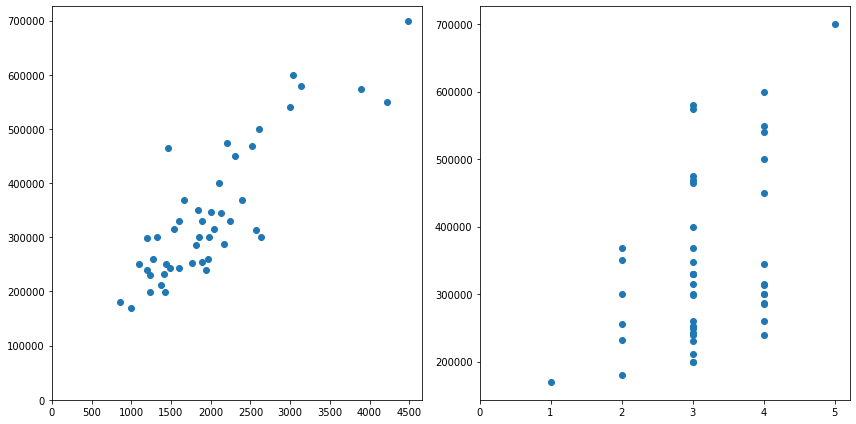

In [13]:
fig,axes=plt.subplots( figsize=(12,6), nrows=1, ncols=2);
axes[0].scatter(X1[:,0],y1);
axes[0].set_xlim(0);
axes[0].set_xticks(np.arange(0,5000,500));
axes[0].set_yticks(np.arange(0,800000,100000));
axes[1].scatter(X1[:,1],y1);
axes[1].set_xticks(np.arange(0,6,1));
fig.tight_layout();
plt.show();

In [14]:
def normalize(X1):
    mu= np.mean(X1, axis=0)
    sigma= np.std(X1, axis=0)
    X_normal=(X1-mu)/sigma
    return X_normal, mu, sigma

In [15]:
X_normal, mu, sigma= normalize(X1)
X1=np.append(np.ones((m1,1)), X_normal, axis=1)

In [16]:
def computeCostMulti(X1, y1, theta1):
    J1=sum((np.matmul(X1,theta1)-y1)**2)/(2*m1)
    return J1

In [17]:
def gradientDescentMulti(X1, y1, theta1, alpha, num_iters):
    theta=theta1.copy()
    J_history=[]
    for i in range(num_iters):
        theta1-=alpha * np.matmul( X1.transpose(), (np.matmul(X1, theta1) - y1) )/m
        J_history.append(computeCostMulti(X1,y1,theta1))
    return theta1, J_history  

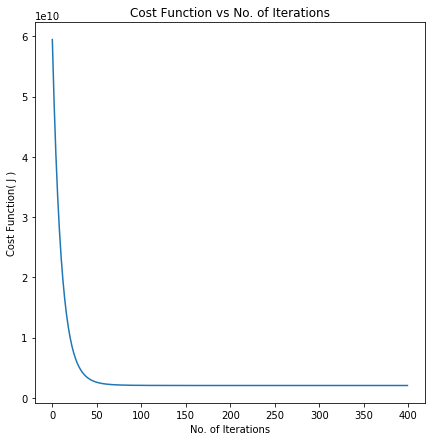

In [18]:
theta1, J_history= gradientDescentMulti(X1, y1, np.array([0.0,0.0,0.0]), 0.1, 400)
plt.figure(figsize=(7,7));
plt.title("Cost Function vs No. of Iterations")
plt.plot(J_history);
plt.xlabel("No. of Iterations");
plt.ylabel("Cost Function"+"("+" J "+")");
plt.show();

In [19]:
print(theta1)
x= normalize(np.array([1510,3]))[0]
x=np.append(np.ones(1),x)
def estimateMulti(x,theta1):
    cost=np.matmul(theta1.transpose(),x)
    return cost
print("Price for a 1510 sq.feet, 3 bedroom house is: $", end="")
print(round(estimateMulti(x,theta1),2))

[340412.6587728  109437.33476763  -6567.89315215]
Price for a 1510 sq.feet, 3 bedroom house is: $456417.89
